<a href="https://colab.research.google.com/github/mannam95/Deep_Learning_Programming/blob/main/Assignment3/Assignment_3_IDL_Meghana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team Assignment


1.   Srinath Mannam (229750)
2.   Meghana Rao (234907)
3.   Govind Shukla (235192)

####Import Statements

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

#### Main function calling all the models

In [ ]:
def main():

  train_steps = 3000

  #---------MNIST------------ 
  dataset_mnist = Dataset_MNIST()
  mnist_train_data, mnist_test_data = dataset_mnist.set_train_test_data()

  ## model_config_1
  mnist_model_1, mnist_model_1_optimizer, mnist_model_1_loss_fn, mnist_model_1_train_acc_metric, mnist_model_1_test_acc_metric = dataset_mnist.set_conv_model_1()
  print("-------MNIST model_1 Summary----------")
  mnist_model_1.summary()
  print("---------MNIST Model Train-----------")
  start_conv_model_train(train_steps, mnist_train_data, mnist_model_1, mnist_model_1_loss_fn, mnist_model_1_optimizer, mnist_model_1_train_acc_metric)
  print("---------MNIST Model Test-----------")
  start_conv_model_test(mnist_test_data, mnist_model_1, mnist_model_1_test_acc_metric)

  #--------Fashion MNIST-----------
  dataset_fashion_mnist = Dataset_Fashion_MNIST()
  fmnist_train_data, fmnist_test_data = dataset_fashion_mnist.set_train_test_data()
  
  ## model_config_1
  fmnist_model_1, fmnist_model_1_optimizer, fmnist_model_1_loss_fn, fmnist_model_1_train_acc_metric, fmnist_model_1_test_acc_metric = dataset_fashion_mnist.set_conv_model_1()
  print("-------Fashion MNIST model_1 Summary----------")
  fmnist_model_1.summary()
  print("---------Fashion MNIST Model Train-----------")
  start_conv_model_train(train_steps, fmnist_train_data, fmnist_model_1, fmnist_model_1_loss_fn, fmnist_model_1_optimizer, fmnist_model_1_train_acc_metric)
  print("---------Fashion MNIST Model Test-----------")
  start_conv_model_test(fmnist_test_data, fmnist_model_1, fmnist_model_1_test_acc_metric)

  # --------CIFAR10------------
  cifar_10 = Dataset_Cifar10()
  cifar_10_train_data, cifar_10_test_data = cifar_10.set_train_test_data()
  
  ## model_config_1
  cifar_10_model_1, cifar_10_model_1_optimizer, cifar_10_model_1_loss_fn, cifar_10_model_1_train_acc_metric, cifar_10_model_1_test_acc_metric = cifar_10.set_conv_model_1()
  print("-------Cifar10 model_1 Summary----------")
  cifar_10_model_1.summary()
  print("---------Cifar10 Model1 Train-----------")
  start_conv_model_train(train_steps, cifar_10_train_data, cifar_10_model_1, cifar_10_model_1_loss_fn, cifar_10_model_1_optimizer, cifar_10_model_1_train_acc_metric)
  print("---------Cifar10 Model1 Test-----------")
  start_conv_model_test(cifar_10_test_data, cifar_10_model_1, cifar_10_model_1_test_acc_metric)

  ## model_config_2
  cifar_10_train_data_aug, cifar_10_test_data_aug = cifar_10.set_train_test_data_with_data_aug()
  cifar_10_model_2, cifar_10_model_2_optimizer, cifar_10_model_2_loss_fn, cifar_10_model_2_train_acc_metric, cifar_10_model_2_test_acc_metric = cifar_10.set_conv_model_2()
  print("-------Cifar10 model_2 Summary----------")
  cifar_10_model_2.summary()
  print("---------Cifar10 Model2 Train-----------")
  start_conv_model_train(train_steps, cifar_10_train_data_aug, cifar_10_model_2, cifar_10_model_2_loss_fn, cifar_10_model_2_optimizer, cifar_10_model_2_train_acc_metric)
  print("---------Cifar10 Model2 Test-----------")
  start_conv_model_test(cifar_10_test_data_aug, cifar_10_model_2, cifar_10_model_2_test_acc_metric)
      

####MNIST Dataset

#####Train Accuracy: 0.9952343702316284
#####Test acc: 0.9911999702453613

In [ ]:
class Dataset_MNIST:

  def __init__(self, **kwargs):
     super().__init__(**kwargs)
     self.mnist = tf.keras.datasets.mnist
     (self.train_images, self.train_labels), (self.test_images, self.test_labels) = self.mnist.load_data()
     self.input_shape = (28, 28, 1)
     self.num_classes = 10
     print(self.train_labels[0])
     plt.imshow(self.train_images[0])
  
  def set_train_test_data(self):
    train_data = tf.data.Dataset.from_tensor_slices((self.train_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, self.train_labels.astype(np.int32)))
    train_data = train_data.shuffle(buffer_size=60000).batch(128).repeat()
    test_data = tf.data.Dataset.from_tensor_slices((self.test_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, self.test_labels.astype(np.int32))).batch(128)

    return train_data, test_data
  
  def set_conv_model_1(self):
    layer_list = [tf.keras.layers.Conv2D(32,(3, 3), padding='same', activation='relu',input_shape=self.input_shape),
                  tf.keras.layers.MaxPool2D(),
                  tf.keras.layers.Conv2D(64,(3, 3), padding='same', activation='relu'),
                  tf.keras.layers.MaxPool2D(),                 
                  tf.keras.layers.Flatten(),
                  tf.keras.layers.Dropout(0.3),
                  tf.keras.layers.Dense(64, activation=tf.nn.leaky_relu),
                  tf.keras.layers.Dense(32, activation=tf.nn.leaky_relu),
                  tf.keras.layers.Dense(self.num_classes)]
    model = tf.keras.Sequential(layer_list)
    optimizer = tf.optimizers.Adam()  # tune this
    loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)# from_logits = True!! #neverforget
    train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
    test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

    return model, optimizer, loss_fn, train_acc_metric, test_acc_metric
   

####Fashion MNIST Dataset

#####Train Accuracy: 0.9312499761581421
#####Test acc: 0.9126999974250793

In [ ]:
class Dataset_Fashion_MNIST:

  def __init__(self, **kwargs):
     super().__init__(**kwargs)
     self.fashion_mnist = tf.keras.datasets.fashion_mnist
     (self.train_images, self.train_labels), (self.test_images, self.test_labels) = self.fashion_mnist.load_data()
     self.input_shape = (28, 28, 1)
     self.num_classes = 10
     print(self.train_labels[0])
     plt.imshow(self.train_images[0])
  
  def set_train_test_data(self):
    train_data = tf.data.Dataset.from_tensor_slices((self.train_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, self.train_labels.astype(np.int32)))
    train_data = train_data.shuffle(buffer_size=60000).batch(128).repeat()
    test_data = tf.data.Dataset.from_tensor_slices((self.test_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, self.test_labels.astype(np.int32))).batch(128)
    
    return train_data, test_data
  
  def set_conv_model_1(self):
    layer_list = [tf.keras.layers.Conv2D(32,(3, 3), padding='same', activation='relu',input_shape=self.input_shape),
                  tf.keras.layers.MaxPool2D(),
                  tf.keras.layers.Conv2D(64,(3, 3), padding='same', activation='relu'),
                  tf.keras.layers.MaxPool2D(),                 
                  tf.keras.layers.Flatten(),
                  tf.keras.layers.Dropout(0.3),
                  tf.keras.layers.Dense(64, activation=tf.nn.leaky_relu),
                  tf.keras.layers.Dense(32, activation=tf.nn.leaky_relu),
                  tf.keras.layers.Dense(self.num_classes)]  # default is no activation
    model = tf.keras.Sequential(layer_list)
    optimizer = tf.optimizers.Adam()  # tune this
    loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True) # from_logits = True!! #neverforget
    train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
    test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

    return model, optimizer, loss_fn, train_acc_metric, test_acc_metric 
  

####Cifar10 Dataset

#####Train Accuracy: 0.8618749976158142
#####Test acc: 0.7452999949455261

In [ ]:
class Dataset_Cifar10:

  def __init__(self, **kwargs):
     super().__init__(**kwargs)
     self.cifar10 = tf.keras.datasets.cifar10
     (self.train_images, self.train_labels), (self.test_images, self.test_labels) = self.cifar10.load_data()
     self.input_shape = (32, 32, 3)
     self.num_classes = 10
     self.datagen = ImageDataGenerator(
              rotation_range=15,
              horizontal_flip=True,
              width_shift_range=0.1,
              height_shift_range=0.1)
     print(self.train_labels[0])
     plt.imshow(self.train_images[0])
  
  def set_train_test_data(self):
    train_data = tf.data.Dataset.from_tensor_slices((self.train_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, self.train_labels.astype(np.int32)))
    train_data = train_data.shuffle(buffer_size=60000).batch(128).repeat(30)
    test_data = tf.data.Dataset.from_tensor_slices((self.test_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, self.test_labels.astype(np.int32))).batch(128)
    
    return train_data, test_data
  
  def set_conv_model_1(self):
    layer_list = [tf.keras.layers.Conv2D(32,(3, 3), padding='same', activation='relu',input_shape=self.input_shape),
                  tf.keras.layers.MaxPool2D(),
                  tf.keras.layers.Conv2D(64,(3, 3), padding='same', activation='relu'),
                  tf.keras.layers.MaxPool2D(),
                  tf.keras.layers.Conv2D(128,(3, 3), padding='same', activation='relu'),
                  tf.keras.layers.MaxPool2D(),
                  tf.keras.layers.Conv2D(256,(3, 3), padding='same', activation='relu'),
                  tf.keras.layers.MaxPool2D(),
                  tf.keras.layers.Conv2D(512,(3, 3), padding='same', activation='relu'),
                  tf.keras.layers.MaxPool2D(),                  
                  tf.keras.layers.Flatten(),
                  tf.keras.layers.Dropout(0.3),
                  tf.keras.layers.Dense(64, activation=tf.nn.leaky_relu),
                  tf.keras.layers.Dense(32, activation=tf.nn.leaky_relu),
                  tf.keras.layers.Dense(self.num_classes)]   # default is no activation
    model = tf.keras.Sequential(layer_list)
    optimizer = tf.optimizers.Adam()  # tune this
    loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)# from_logits = True!! #neverforget
    train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
    test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

    return model, optimizer, loss_fn, train_acc_metric, test_acc_metric

  def set_train_test_data_with_data_aug(self):

    self. datagen.fit(self.train_images)
    train_data = tf.data.Dataset.from_tensor_slices((self.train_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, self.train_labels.astype(np.int32)))
    train_data = train_data.shuffle(buffer_size=60000).batch(128).repeat(30)
    test_data = tf.data.Dataset.from_tensor_slices((self.test_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, self.test_labels.astype(np.int32))).batch(128)

    return train_data, test_data

  def set_conv_model_2(self):
    layer_list = [tf.keras.layers.Conv2D(32,(3, 3), padding='same', activation='relu',input_shape=self.input_shape),
                  tf.keras.layers.MaxPool2D(),
                  tf.keras.layers.Conv2D(64,(3, 3), padding='same', activation='relu'),
                  tf.keras.layers.MaxPool2D(),
                  tf.keras.layers.Conv2D(128,(3, 3), padding='same', activation='relu'),
                  tf.keras.layers.MaxPool2D(),
                  tf.keras.layers.Conv2D(256,(3, 3), padding='same', activation='relu'),
                  tf.keras.layers.MaxPool2D(),
                  tf.keras.layers.Conv2D(512,(3, 3), padding='same', activation='relu'),
                  tf.keras.layers.MaxPool2D(),                  
                  tf.keras.layers.Flatten(),
                  tf.keras.layers.Dropout(0.3),
                  tf.keras.layers.Dense(64, activation=tf.nn.leaky_relu),
                  tf.keras.layers.Dense(32, activation=tf.nn.leaky_relu),
                  tf.keras.layers.Dense(self.num_classes)]   # default is no activation
    model = tf.keras.Sequential(layer_list)
    optimizer = tf.optimizers.Adam()  # tune this
    loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)# from_logits = True!! #neverforget
    train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
    test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

    return model, optimizer, loss_fn, train_acc_metric, test_acc_metric


####Model Train

In [ ]:
def start_conv_model_train(train_steps, train_data, model, loss_fn, optimizer, train_acc_metric):
  for step, (image_batch, label_batch) in enumerate(train_data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
      logits = model(image_batch)
      loss = loss_fn(label_batch, logits)# loss format is generally: first argument targets, second argument outputs

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    variables = model.trainable_variables
    gradients = tape.gradient(loss, variables)
      
    optimizer.apply_gradients(zip(gradients, variables))
    
    train_acc_metric(label_batch, logits)
    
    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(loss, train_acc_metric.result()))
        train_acc_metric.reset_states()

####Model Test

In [ ]:
def start_conv_model_test(test_data, model, test_acc_metric):
  for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
  print("Test acc: {}".format(test_acc_metric.result()))

####Main

11501568/11490434 [==============================] - 0s 0us/step
5
-------MNIST model_1 Summary----------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dropout (Dropout)            (None, 3136)              0         
________________

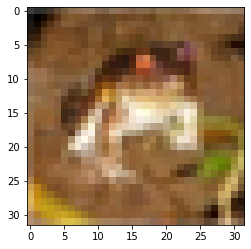

In [ ]:
if __name__ == "__main__":
    main()